In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create random
X = 2 * np.random.rand(1000000,1)
y = 4 +3 * X+np.random.randn(1000000,1)

In [3]:
# print(X)
# print(y)

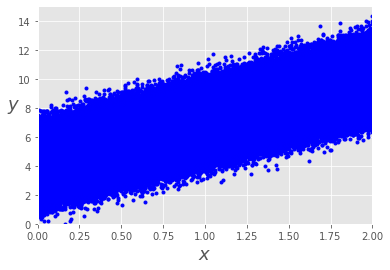

In [4]:
plt.style.use(['ggplot'])
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [82]:
# cost function
def  cal_cost(X, y, theta):
    m = len(X)
    cost_sum = 0.0
    for X,y in zip(X,y):
#       y_hat = theta0+theta1*X => [theta0,theta1] X [1,X]
        y_hat = np.dot(theta, np.array([1.0, X]))
        cost_sum += (y_hat -y) ** 2
    
    cost = cost_sum/(m * 2.0)
    return cost

In [83]:
print(cal_cost(X, y, np.array([21.0, 80.0])))

[5405.49433078]


In [89]:
from IPython.display import clear_output
import time
def gradient_descent_batch(X, y, theta, eta, max_itr):
    itr = 0
    m = len(X)
    cost = np.zeros(max_itr)
    itr_hist = np.zeros(max_itr)
    eta_hist = np.zeros([2, max_itr])
    
    while itr < max_itr:
        itr_hist[itr] = itr
        cost[itr] = cal_cost(X, y, theta)
        eta_hist[:, itr] = eta
        clear_output(wait=True)
        print('----------------')
        print('iterations = %s' %itr)
        print('cost = %s' %cost[itr])
        print('----------------')
        time.sleep(0.005)
        for Xi,yi in zip(X, y):
            y_hat = np.dot(theta, np.array([1.0, Xi]))
            gradient = np.array([1.0, Xi]) * (y_hat - yi)
            theta = theta - (eta * gradient/m)
        itr += 1
    return eta, cost, eta_hist, itr_hist, theta

In [12]:
"""Train the model"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
max_iter = 1500
# theta_0 = np.array([20.0, 80.0])
# for random theta
# eta_0 = 1e-3
theta_0 = np.random.randn(1,2)
theta_1 = theta_0
theta_2 = theta_0
theta_3 = theta_0
theta_4 = theta_0
theta_5 = theta_0
theta_6 = theta_0

eta_0 = 0.001
eta_0, cost_0, eta_hist_0, itr_hist_0, theta_0 = gradient_descent_batch(X_train, y_train, theta_0, eta_0, max_iter)

eta_1 = 0.003
eta_1, cost_1, eta_hist_1, itr_hist_1, theta_1 = gradient_descent_batch(X_train, y_train, theta_1, eta_1, max_iter)

eta_2 = 0.01
eta_2, cost_2, eta_hist_2, itr_hist_2, theta_2 = gradient_descent_batch(X_train, y_train, theta_2, eta_2, max_iter)

eta_3 = 0.03
eta_3, cost_3, eta_hist_3, itr_hist_3, theta_3 = gradient_descent_batch(X_train, y_train, theta_3, eta_3, max_iter)

eta_4 = 0.1
eta_4, cost_4, eta_hist_4, itr_hist_4, theta_4 = gradient_descent_batch(X_train, y_train, theta_4, eta_4, max_iter)

eta_5 = 0.3
eta_5, cost_5, eta_hist_5, itr_hist_5, theta_5 = gradient_descent_batch(X_train, y_train, theta_5, eta_5, max_iter)

eta_6 = 1
eta_6, cost_6, eta_hist_6, itr_hist_6, theta_6 = gradient_descent_batch(X_train, y_train, theta_6, eta_6, max_iter)


----------------
iterations = 1499
cost = 0.5057790217957084
----------------


In [128]:
# print the output params
print("eta: %s" %eta)
print("theta: %s" %theta)

# this should be used for the model
# down we will use this values to 

eta: 0.001
theta: [[array([3.54757096]) array([3.18636051])]]


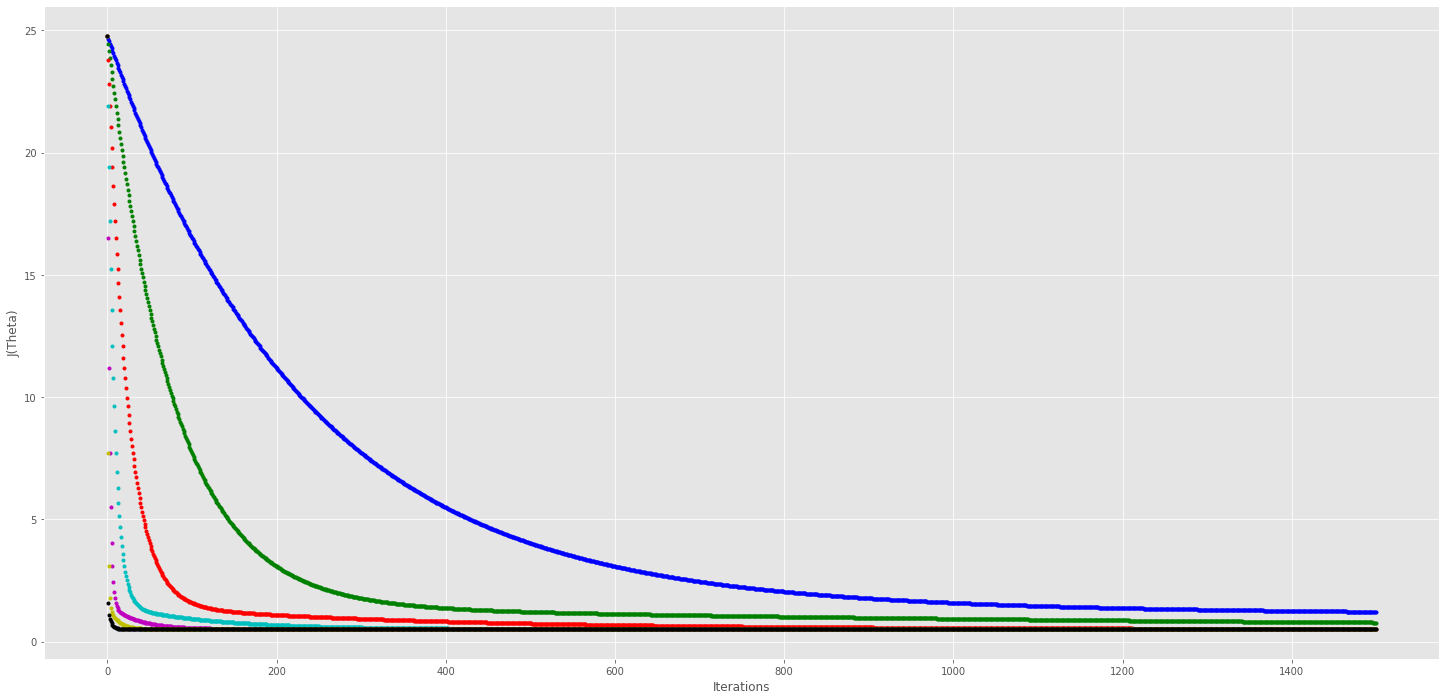

In [19]:
# plot the itr vs cost for different ETA or learning rate

fig,ax = plt.subplots(figsize=(25,12))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(itr_hist_0,cost_0,'b.',label='0.001')
_=ax.plot(itr_hist_1,cost_1,'g.',label='0.001')
_=ax.plot(itr_hist_2,cost_2,'r.',label='0.001')
_=ax.plot(itr_hist_3,cost_3,'c.',label='0.001')
_=ax.plot(itr_hist_4,cost_4,'m.',label='0.001')
_=ax.plot(itr_hist_5,cost_5,'y.',label='0.001')
_=ax.plot(itr_hist_6,cost_6,'k.',label='0.001')
# after 1000 itr there are not much improvment.

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# solved using eta = 0.01
max_iter = 1000
theta = np.random.randn(1,2)
eta = 0.01
eta, cost, eta_hist, itr_hist, theta = gradient_descent_batch(X_train, y_train, theta, eta, max_iter)
print(theta)

----------------
iterations = 999
cost = 0.5019461785161194
----------------
[[array([4.09536783]) array([2.91882933])]]


In [91]:
# lets use normal equation methid
# theta = inv(XT * X) * XT * y
# get X transpose
m = len(X)
X_bias = np.ones((m, 1))
X1 = np.reshape(X,(m,1))
X1 = np.append(X_bias,X1,axis=1)
X_trans = np.transpose(X1)
X_trans_dot_X = X_trans.dot(X1)
X_trans_dot_X_inv = np.linalg.inv(X_trans_dot_X)
X_trans_dot_y = X_trans.dot(y)
theta = X_trans_dot_X_inv.dot(X_trans_dot_y)
print(theta)
# Above we went very close to theta - but take so much time

[[4.00408222]
 [2.99591088]]


In [193]:
# with 3 veriables
X = 2 * np.random.rand(100000000,10)
y = 4 +2*(X[:,[0]]) + 3*(X[:,[1]]) + 5*(X[:,[2]]) + np.random.randn(100000000,1)

In [194]:
X_b = np.c_[np.ones((100000000, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [195]:
# print(X[:,[0]])
print(theta_best)

[[ 4.00013145e+00]
 [ 1.99979176e+00]
 [ 3.00018189e+00]
 [ 4.99990060e+00]
 [-1.07377550e-04]
 [ 1.24888713e-04]
 [-1.88289852e-04]
 [ 8.10071992e-05]
 [ 1.39902145e-04]
 [ 5.41579205e-06]
 [-1.08455282e-04]]


In [ ]:
# i will be using 1/2 of cost function so 2 will get cancle and in partial derivatives we will have 1/m not 2/m


X